In [16]:
#Loading up all libraries
import numpy as np  
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img  
from keras.models import Sequential  
from keras.layers import Dropout, Flatten, Dense  
from keras import applications  
from keras.utils.np_utils import to_categorical  
import matplotlib.pyplot as plt  
import matplotlib.image as mpimg
%matplotlib inline
import math  
import cv2  
import datetime

In [17]:
# dimensions of our images.  
img_width, img_height = 224, 224  
   
top_model_weights_path = 'bottleneck_fc_model.h5'  
train_data_dir = 'data/train'  
validation_data_dir = 'data/validation' 
test_data_dir= 'data/test'
   
# number of epochs to train top model  
epochs = 100  
# batch size used by flow_from_directory and predict_generator  
batch_size = 50  

In [18]:
start = datetime.datetime.now()
datagen_top = ImageDataGenerator(rescale=1./255)  
generator_top = datagen_top.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
# load the bottleneck features saved earlier  
train_data = np.load('bottleneck_features_train.npy')  
   
# get the class lebels for the training data, in the original order  
train_labels = generator_top.classes  
   
# convert the training labels to categorical vectors  
train_labels = to_categorical(train_labels, num_classes=num_classes) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 13412 images belonging to 6 classes.
Time:  0:00:01.425043


In [19]:
generator_top = datagen_top.flow_from_directory(  
         validation_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_validation_samples = len(generator_top.filenames)  
   
validation_data = np.load('bottleneck_features_validation.npy')  
   

validation_labels = generator_top.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes)  

Found 2549 images belonging to 6 classes.


In [20]:
generator_top = datagen_top.flow_from_directory(  
         test_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode=None,  
         shuffle=False)  
   
nb_test_samples = len(generator_top.filenames)  
   
test_data = np.load('bottleneck_features_test.npy')  
   

test_labels = generator_top.classes  
test_labels = to_categorical(test_labels, num_classes=num_classes) 

Found 1845 images belonging to 6 classes.


First Model Softmax One Hidden Layer

In [12]:
start = datetime.datetime.now()
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(256, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(num_classes, activation='softmax'))  

model.compile(optimizer='rmsprop',  
          loss='categorical_crossentropy', metrics=['accuracy'])  

history = model.fit(train_data, train_labels,  
      epochs=5,  
      batch_size=batch_size,  
      validation_data=(validation_data, validation_labels))  

model.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = model.evaluate(  
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Train on 13412 samples, validate on 2549 samples
Epoch 1/5
13412/13412 [==============================] - 13s 985us/step - loss: 2.0382 - acc: 0.6707 - val_loss: 0.4915 - val_acc: 0.8321
Epoch 2/5
13412/13412 [==============================] - 13s 952us/step - loss: 0.5033 - acc: 0.8339 - val_loss: 0.5426 - val_acc: 0.8407
Epoch 3/5
13412/13412 [==============================] - 13s 962us/step - loss: 0.3993 - acc: 0.8688 - val_loss: 0.3190 - val_acc: 0.8976
Epoch 4/5
13412/13412 [==============================] - 14s 1ms/step - loss: 0.3539 - acc: 0.8885 - val_loss: 0.3450 - val_acc: 0.8882
Epoch 5/5
2549/2549 [==============================] - 1s 210us/step
[INFO] accuracy: 88.78%
[INFO] Loss: 0.3854629319510468
Time:  0:01:07.064059


# Second Model softmax two hidden layer and learning rate

In [13]:
start = datetime.datetime.now()
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(100, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(50, activation='relu'))  
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation='softmax'))  

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])  

history = model.fit(train_data, train_labels,  
      epochs=7,
      batch_size=batch_size,  
      validation_data=(validation_data, validation_labels))  

model.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = model.evaluate(  
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Train on 13412 samples, validate on 2549 samples
Epoch 1/7
13412/13412 [==============================] - 6s 458us/step - loss: 1.0216 - acc: 0.6118 - val_loss: 0.5337 - val_acc: 0.8356
Epoch 2/7
13412/13412 [==============================] - 5s 399us/step - loss: 0.6271 - acc: 0.7777 - val_loss: 0.3772 - val_acc: 0.8917
Epoch 3/7
13412/13412 [==============================] - 5s 403us/step - loss: 0.5076 - acc: 0.8284 - val_loss: 0.3390 - val_acc: 0.9015
Epoch 4/7
13412/13412 [==============================] - 5s 402us/step - loss: 0.4451 - acc: 0.8525 - val_loss: 0.3693 - val_acc: 0.8733
Epoch 5/7
13412/13412 [==============================] - 5s 407us/step - loss: 0.3751 - acc: 0.8775 - val_loss: 0.2903 - val_acc: 0.9055
Epoch 6/7
13412/13412 [==============================] - 5s 408us/step - loss: 0.3342 - acc: 0.8900 - val_loss: 0.2950 - val_acc: 0.9078
Epoch 7/7
2549/2549 [==============================] - 0s 100us/step
[INFO] accuracy: 91.25%
[INFO] Loss: 0.2706087226462439
Time

## second model softmax but with leaky relu

In [27]:
import keras
start = datetime.datetime.now()
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3)))  
model.add(Dropout(0.5))  
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3)))  
model.add(Dropout(0.3)) 
model.add(Dense(num_classes, activation='softmax'))  

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])  

history = model.fit(train_data, train_labels,  
      epochs=7,
      batch_size=batch_size,  
      validation_data=(validation_data, validation_labels))  

model.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = model.evaluate(  
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Train on 13412 samples, validate on 2549 samples
Epoch 1/7
13412/13412 [==============================] - 6s 453us/step - loss: 0.7323 - acc: 0.7437 - val_loss: 0.3733 - val_acc: 0.8811
Epoch 2/7
13412/13412 [==============================] - 5s 397us/step - loss: 0.4150 - acc: 0.8595 - val_loss: 0.3521 - val_acc: 0.8733
Epoch 3/7
13412/13412 [==============================] - 6s 445us/step - loss: 0.3294 - acc: 0.8905 - val_loss: 0.2769 - val_acc: 0.9094
Epoch 4/7
13412/13412 [==============================] - 6s 450us/step - loss: 0.2814 - acc: 0.9049 - val_loss: 0.2671 - val_acc: 0.9109
Epoch 5/7
13412/13412 [==============================] - 6s 418us/step - loss: 0.2392 - acc: 0.9219 - val_loss: 0.2586 - val_acc: 0.9141
Epoch 6/7
13412/13412 [==============================] - 6s 414us/step - loss: 0.2128 - acc: 0.9295 - val_loss: 0.2876 - val_acc: 0.9070
Epoch 7/7
2549/2549 [==============================] - 0s 98us/step
[INFO] accuracy: 92.00%
[INFO] Loss: 0.2689016077224649
Time:

## visualization

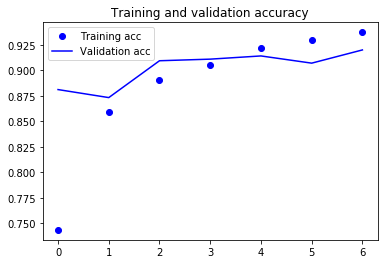

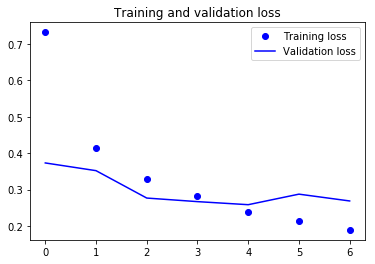

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [101]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_43 (Dense)             (None, 100)               2508900   
_________________________________________________________________
dropout_23 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_45 (Dense)             (None, 6)                 306       
Total params: 2,514,256
Trainable params: 2,514,256
Non-trainable params: 0
_________________________________________________________________


In [116]:
import keras_vis 
# from viz.input_modifiers import Jitter 
class_idx = 0
val_y= test_labels
val_x= test_data
indices = np.where(val_y[:, class_idx] == 1.)[0]

# pick some random input from here.
idx = indices[0]

# Lets sanity check the picked image.
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

plt.imshow(val_x[idx][..., 0])


from vis.visualization import visualize_saliency
from vis.utils import utils
from keras import activations

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'preds')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.softmax
model = utils.apply_modifications(model)

grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, seed_input=val_x[idx])
# Plot with 'jet' colormap to visualize as a heatmap.
plt.imshow(grads, cmap='jet')


# This corresponds to the Dense linear layer.
for class_idx in np.arange(10): 
    indices = np.where(val_y[:, class_idx] == 1.)[0]
    idx = indices[0]

    f, ax = plt.subplots(1, 4)
    ax[0].imshow(val_x[idx][..., 0])
 
    for i, modifier in enumerate([None, 'guided', 'relu']):
        grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, 
        seed_input=val_x[idx], backprop_modifier=modifier)
        if modifier is None:
            modifier = 'vanilla'
        ax[i+1].set_title(modifier) 
        ax[i+1].imshow(grads, cmap='jet')

ModuleNotFoundError: No module named 'keras_vis'

In [29]:
model.evaluate(test_data, test_labels)

1845/1845 [==============================] - 0s 189us/step


[0.21445707488189222, 0.9311653117177286]

GRIDSEARCH

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [46]:
param_grid = dict(epochs=[x for x in range(1,15)])

In [54]:
grid = GridSearchCV(estimator=model, scoring='accuracy' ,param_grid=param_grid, n_jobs=-1)

In [55]:
grid_result = grid.fit(train_data, train_labels)

/Users/Iffy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


TypeError: Cannot clone object '<keras.engine.sequential.Sequential object at 0xba388b198>' (type <class 'keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

Third Model Softmax with multiple hidden and dropout later

In [54]:
start = datetime.datetime.now()
model = Sequential()  
model.add(Flatten(input_shape=train_data.shape[1:]))  
model.add(Dense(200, activation='relu'))  
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu')) 
model.add(Dropout(0.6))
model.add(Dense(50, activation='relu'))  
model.add(Dense(num_classes, activation='softmax'))  

model.compile(optimizer='rmsprop',  
          loss='categorical_crossentropy', metrics=['accuracy'])  

history = model.fit(train_data, train_labels,  
      epochs=20,  
      batch_size=batch_size,  
      validation_data=(validation_data, validation_labels))  

model.save_weights(top_model_weights_path)  

(eval_loss, eval_accuracy) = model.evaluate(  
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))  
print("[INFO] Loss: {}".format(eval_loss))  
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Train on 13412 samples, validate on 2549 samples
Epoch 1/20
13412/13412 [==============================] - 12s 914us/step - loss: 1.3061 - acc: 0.5381 - val_loss: 0.6616 - val_acc: 0.7603
Epoch 2/20
13412/13412 [==============================] - 11s 784us/step - loss: 0.8044 - acc: 0.7053 - val_loss: 0.6882 - val_acc: 0.7717
Epoch 3/20
13412/13412 [==============================] - 10s 769us/step - loss: 0.6879 - acc: 0.7505 - val_loss: 0.4405 - val_acc: 0.8427
Epoch 4/20
13412/13412 [==============================] - 10s 776us/step - loss: 0.6346 - acc: 0.7707 - val_loss: 0.3599 - val_acc: 0.9000
Epoch 5/20
13412/13412 [==============================] - 10s 778us/step - loss: 0.5947 - acc: 0.7835 - val_loss: 0.3445 - val_acc: 0.8984
Epoch 6/20
13412/13412 [==============================] - 10s 777us/step - loss: 0.5653 - acc: 0.7909 - val_loss: 0.3544 - val_acc: 0.8980
Epoch 7/20
13412/13412 [==============================] - 10s 779us/step - loss: 0.5400 - acc: 0.8058 - val_loss: 0.3

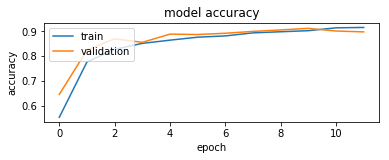

In [35]:
plt.figure(1)  

# summarize history for accuracy  

plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
  

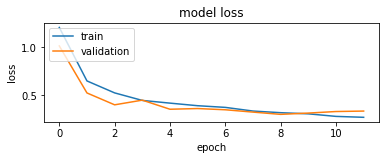

In [36]:
# summarize history for loss  

plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()

In [69]:
image_path = 'data/test/elephants/OIP-wxKaLAcA94Sf5lyZ65A08gHaFs.jpeg'  

orig = mpimg.imread(image_path)  

print("[INFO] Image Loaded")  
image = load_img(image_path, target_size=(224, 224))  
image = img_to_array(image)  

# important! otherwise the predictions will be '0'  
image = image / 255  

image = np.expand_dims(image, axis=0)  
# print(image)

[INFO] Image Loaded


In [70]:
# build the VGG16 network  
model = applications.VGG16(include_top=False, weights='imagenet')  

# get the bottleneck prediction from the pre-trained VGG16 model  
bottleneck_prediction = model.predict(image)  

# build top model  
model = Sequential()  
model.add(Flatten(input_shape=bottleneck_prediction.shape[1:]))  
model.add(Dense(100, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(50, activation='relu'))  
model.add(Dense(num_classes, activation='softmax'))  

model.load_weights(top_model_weights_path)  

# use the bottleneck prediction on the top model to get the final classification  
class_predicted = model.predict_classes(bottleneck_prediction)

In [71]:
inID = class_predicted[0]  

class_dictionary = generator_top.class_indices  

inv_map = {v: k for k, v in class_dictionary.items()}  

label = inv_map[inID]  

# get the prediction label  
print("Image ID: {}, Label: {}".format(inID, label))  

# # display the predictions with the image  
# cv2.putText(orig, "Predicted: {}".format(label), (10, 30), cv2.FONT_HERSHEY_PLAIN, 1.5, (43, 99, 255), 2)  

# cv2.imshow("Classification", orig)  
# cv2.waitKey(0)  
# cv2.destroyAllWindows()  

Image ID: 1, Label: chickens


<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>
(224, 224, 3)


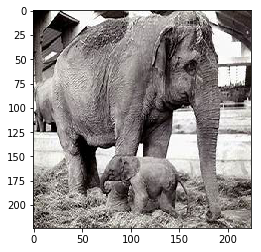

In [72]:
from keras.preprocessing import image

# img = np.random.rand(224,224,3)
# plt.imshow(img)
# plt.show()

img_path = image_path
img = image.load_img(img_path, target_size=(224, 224))
print(type(img))

x = image.img_to_array(img)
print(type(x))
print(x.shape)
plt.imshow(x/255.)

In [90]:
# import lime
# from lime import lime_image

In [97]:
%load_ext autoreload
%reload_ext 
%autoreload
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('data/test/elephants', 'OIP-wxKaLAcA94Sf5lyZ65A08gHaFs.jpeg')) # add the current directory
    import lime
from lime import lime_image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


UsageError: Missing module name.


In [98]:

explainer = lime_image.LimeImageExplainer()

In [100]:
from skimage.segmentation import mark_boundaries
temp, mask = explainer.get_image_and_mask(295, positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

AttributeError: 'LimeImageExplainer' object has no attribute 'get_image_and_mask'

In [34]:
class_dictionary

{'butterflies': 0,
 'chickens': 1,
 'elephants': 2,
 'horses': 3,
 'spiders': 4,
 'squirels': 5}